# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

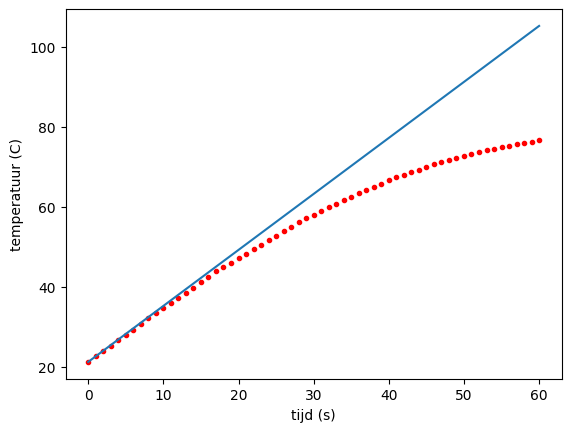

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt(r"C:\Users\fiene\OneDrive\Project Q1 2025\IP Q2\Thermo project Q2 Fiene en Thomas\Fiene-en-Thomas\Content\Labs\tempmetingen-0203356cbb854ce862d0304505c4ede5.csv", delimiter=';', skiprows=1)

m_mb = 0.8208
m_mw1 = 1.2929
m_mw2 = 1.2749
m_w1 = m_mw1 - m_mb
m_w2 = m_mw2 - m_mb
dm = m_w2 - m_w1


t_min = data[:,0]
t = t_min*60
T = data[:,1]
T0 = T[0]

def model(t, T0, k):
    return T0 + k*t

c= 4184.0
P = None

if P is None:
    coef = np.polyfit(t[:3], T[:3], 1)
    slope = coef[0]
    P = c*m_w1*slope

T_exp = T0 + (P / (c* m_w1)) *t

plt.figure()
plt.plot(t_min, T, 'r.')
plt.plot(t_min, T_exp)
plt.xlabel('tijd (s)')
plt.ylabel('temperatuur (C)')
plt.show()



In [11]:
# Opdracht 2

# eindtemperatuur en totale tijd
Te = T[-1]
t_tot = t[-1]         # al in seconden
dT = Te - T0

# totale toegevoerde energie
Q_tot = P * t_tot     # J

# warmte voor opwarmen water
Q_water = m_w1 * c * dT   # c is al 4184 J/(kg K)

# warmte voor opwarmen maatbeker (aannamen)
c_glass = 840.0           # J/(kg K), soortelijke warmte glas (aanname)
Q_beker = m_mb * c_glass * dT

# restwarmte die beschikbaar is voor verdamping
Q_rest = Q_tot - (Q_water + Q_beker)

# latente verdampingswarmte van water
L_v = 2.26e6              # J/kg

# theoretisch verdampte massa
if Q_rest > 0:
    m_verdampt_theor = Q_rest / L_v     # kg
else:
    m_verdampt_theor = 0.0

# gemeten verdampte massa (positief maken)
dm_meet = m_w1 - m_w2     # kg

print("=== Energetische analyse ===")
print(f"vermogen P              = {P:.1f} W")
print(f"totale tijd             = {t_tot:.1f} s")
print(f"Q_tot (toegevoegd)      = {Q_tot:.0f} J")
print(f"Q_water (opwarming)     = {Q_water:.0f} J")
print(f"Q_beker (opwarming)     = {Q_beker:.0f} J")
print(f"Q_rest (voor verdamping)= {Q_rest:.0f} J")
print(f"m_verdampt_theor        = {m_verdampt_theor*1000:.2f} g")
print(f"m_verdampt_gemeten      = {dm_meet*1000:.2f} g")


=== Energetische analyse ===
vermogen P              = 46.1 W
totale tijd             = 3600.0 s
Q_tot (toegevoegd)      = 165922 J
Q_water (opwarming)     = 109430 J
Q_beker (opwarming)     = 38197 J
Q_rest (voor verdamping)= 18296 J
m_verdampt_theor        = 8.10 g
m_verdampt_gemeten      = 18.00 g


Opdracht 2

vermogen P = ...
Q_tot = ...
Q_water = ...
Q_beker = ...
Q_rest = ...
m_verdampt_theor = ...
m_verdampt_gemeten = ...


Opdracht 3

Het experiment wijkt af van de theorie, vooral omdat er veel warmte verloren gaat. Een belangrijke verbetering zou zijn om de maatbeker beter te isoleren, bijvoorbeeld door er isolatiemateriaal omheen te doen, zodat er minder warmte naar de omgeving verdwijnt. Het zou ook helpen om het vermogen van het verwarmingselement nauwkeuriger te bepalen door spanning en stroom te meten, of door een element te gebruiken waarvan het vermogen al bekend is. Daarnaast zou het experiment betrouwbaarder worden als de massa tijdens het verwarmen continu wordt gemeten op een weegschaal, zodat je precies kunt zien hoeveel water er werkelijk verdampt. Verder is het slim om de temperatuursensor eerst te kalibreren en wat vaker te meten, zodat de temperatuurgegevens kloppen en de stijging realistischer is. Tot slot kun je het hele experiment het beste meerdere keren uitvoeren om te controleren of de resultaten steeds ongeveer gelijk zijn. Daarmee krijg je een beter beeld van de onzekerheid in je metingen.